In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:

data = pd.read_csv("elstatistik_sweden.csv")
prod_24_data = pd.read_csv("prod_24_h.csv", sep=';',)
load_24_data = pd.read_csv("load_24_h.csv", sep=";")

In [9]:

prod_24_data.dtypes

Date/Time CET/CEST        object
Date/Time UTC             object
MBA                       object
Production Total [MWh]    object
Hydro [MWh]               object
Nuclear [MWh]             object
Solar [MWh]               object
Thermal [MWh]             object
Wind Onshore [MWh]        object
Wind Offshore [MWh]        int64
Energy Storage [MWh]      object
Other [MWh]               object
dtype: object

In [10]:
prod_24_data

,Date/Time CET/CEST,Date/Time UTC,MBA,Production Total [MWh],Hydro [MWh],Nuclear [MWh],Solar [MWh],Thermal [MWh],Wind Onshore [MWh],Wind Offshore [MWh],Energy Storage [MWh],Other [MWh]
0,01.01.2024/00:00,31.12.2023/23:00,"SE1, SE2, SE3, SE4","17194,164211","5881,938064","6300,99","0,939435","809,767436","4172,928605",0,0,"27,600671"
1,01.01.2024/01:00,01.01.2024/00:00,"SE1, SE2, SE3, SE4","16892,208784","5607,845686","6302,19","0,939513","802,489977","4149,314518",0,0,"29,42909"
2,01.01.2024/02:00,01.01.2024/01:00,"SE1, SE2, SE3, SE4","16664,7559","5383,490754","6301,92","0,971884","795,055549","4153,782483",0,0,"29,53523"
3,01.01.2024/03:00,01.01.2024/02:00,"SE1, SE2, SE3, SE4","16594,797267","5281,014751","6302,21","0,919221","808,631964","4172,891047",0,0,"29,130284"
4,01.01.2024/04:00,01.01.2024/03:00,"SE1, SE2, SE3, SE4","16705,257082","5362,25403","6302,8","0,981863","816,435979","4192,743722",0,0,"30,041488"
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31.12.2024/19:00,31.12.2024/18:00,"SE1, SE2, SE3, SE4","23134,88801","11071,409683","5839,69","1,507701","587,437576","5619,81528",0,"3,182586","11,845184"
8780,31.12.2024/20:00,31.12.2024/19:00,"SE1, SE2, SE3, SE4","23112,690303","10814,311539","5839,29","2,658814","561,721017","5878,773727",0,"3,08382","12,851386"
8781,31.12.2024/21:00,31.12.2024/20:00,"SE1, SE2, SE3, SE4","22640,390382","10533,869627","5840,82","3,557847","550,798398","5680,63706",0,"2,179222","28,528228"
8782,31.12.2024/22:00,31.12.2024/21:00,"SE1, SE2, SE3, SE4","21897,156155","9874,359918","5841,14","2,235744","498,851834","5646,601684",0,"2,203276","31,763699"


In [127]:
prod_24_data.iloc[:,3].max()

26440459901

In [133]:
# combine wind
prod_24_data["Wind"] = prod_24_data.iloc[:, 8] + prod_24_data.iloc[:, 9]

In [134]:
prod_24_data

,Date/Time CET/CEST,Date/Time UTC,MBA,Production Total [MWh],Hydro [MWh],Nuclear [MWh],Solar [MWh],Thermal [MWh],Wind Onshore [MWh],Wind Offshore [MWh],Energy Storage [MWh],Other [MWh],Wind
0,01.01.2024/00:00,31.12.2023/23:00,"SE1, SE2, SE3, SE4",17194164211,5881938064,630099,939435,809767436,4172928605,0,0,27600671,4172928605
1,01.01.2024/01:00,01.01.2024/00:00,"SE1, SE2, SE3, SE4",16892208784,5607845686,630219,939513,802489977,4149314518,0,0,2942909,4149314518
2,01.01.2024/02:00,01.01.2024/01:00,"SE1, SE2, SE3, SE4",166647559,5383490754,630192,971884,795055549,4153782483,0,0,2953523,4153782483
3,01.01.2024/03:00,01.01.2024/02:00,"SE1, SE2, SE3, SE4",16594797267,5281014751,630221,919221,808631964,4172891047,0,0,29130284,4172891047
4,01.01.2024/04:00,01.01.2024/03:00,"SE1, SE2, SE3, SE4",16705257082,536225403,63028,981863,816435979,4192743722,0,0,30041488,4192743722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,31.12.2024/19:00,31.12.2024/18:00,"SE1, SE2, SE3, SE4",2313488801,11071409683,583969,1507701,587437576,561981528,0,3182586,11845184,561981528
8780,31.12.2024/20:00,31.12.2024/19:00,"SE1, SE2, SE3, SE4",23112690303,10814311539,583929,2658814,561721017,5878773727,0,308382,12851386,5878773727
8781,31.12.2024/21:00,31.12.2024/20:00,"SE1, SE2, SE3, SE4",22640390382,10533869627,584082,3557847,550798398,568063706,0,2179222,28528228,568063706
8782,31.12.2024/22:00,31.12.2024/21:00,"SE1, SE2, SE3, SE4",21897156155,9874359918,584114,2235744,498851834,5646601684,0,2203276,31763699,5646601684


In [139]:
prod_24_data.iloc[:,5].max()

6440861012

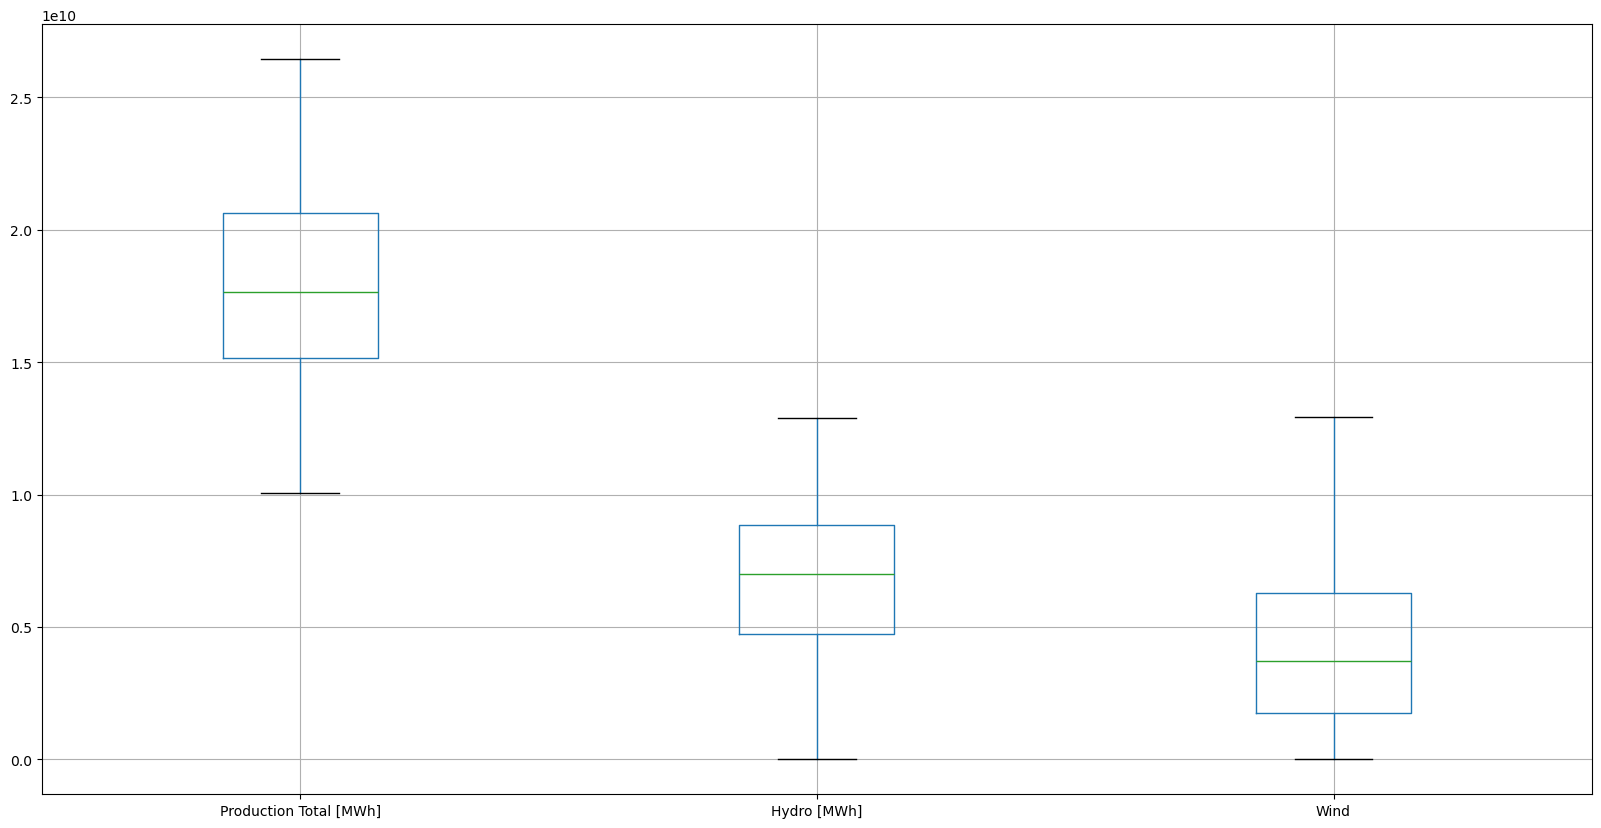

In [136]:
plt.figure(figsize=(20, 10))
#bp = prod_24_data.iloc[:,3:].boxplot(showfliers=False)
bp = pd.concat([prod_24_data.iloc[:,3], prod_24_data.iloc[:,4], prod_24_data.iloc[:,-1]],axis=1).boxplot(showfliers=False)

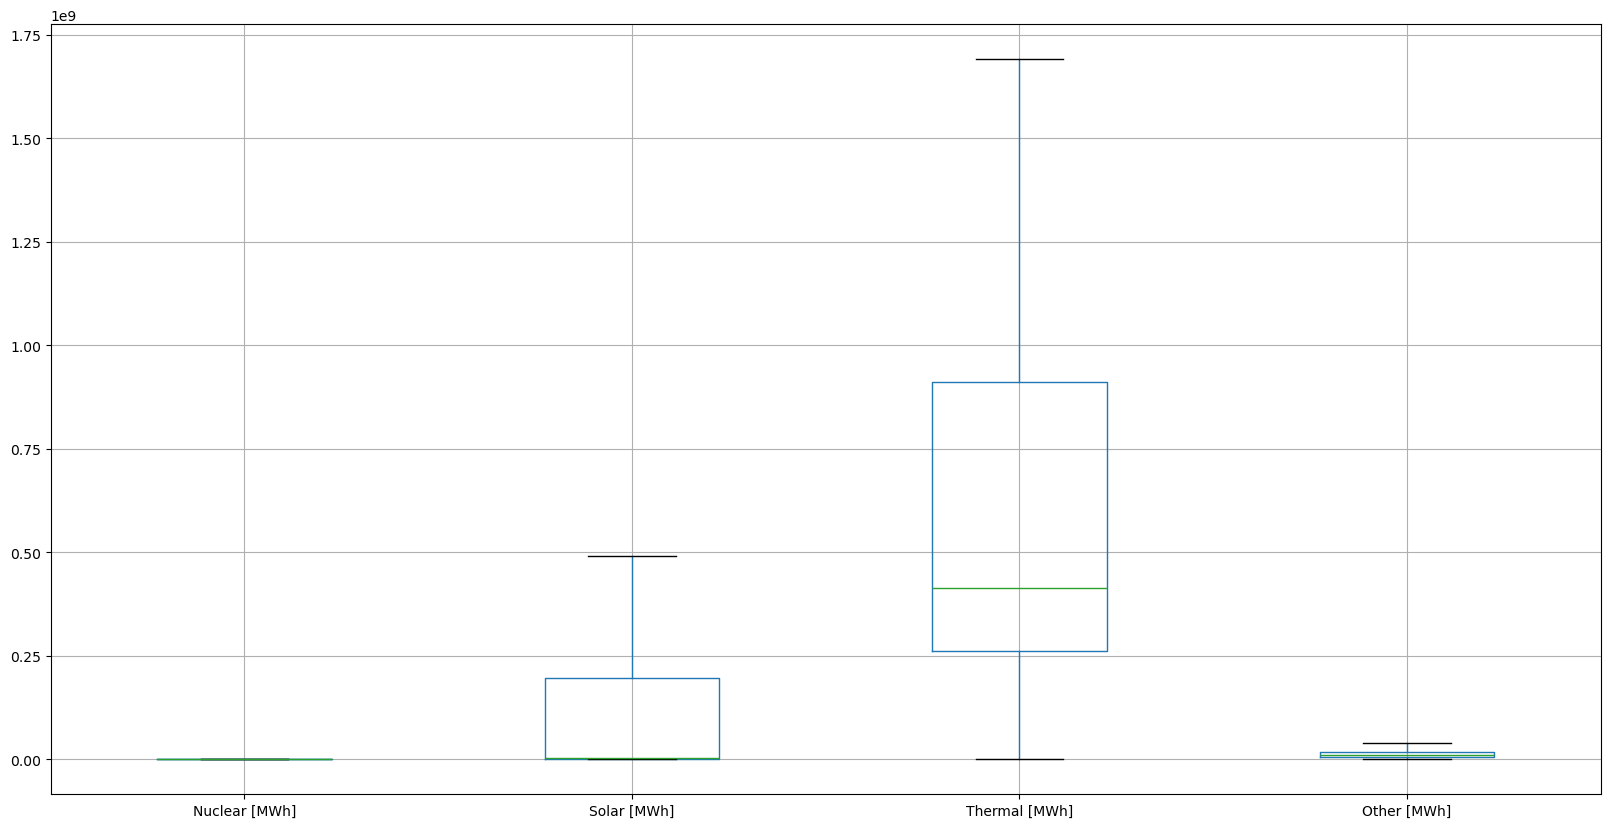

In [137]:
plt.figure(figsize=(20, 10))
#bp = prod_24_data.iloc[:,3:].boxplot(showfliers=False)
bp = pd.concat([prod_24_data.iloc[:,5], prod_24_data.iloc[:,6], prod_24_data.iloc[:,7], prod_24_data.iloc[:,-2]],axis=1).boxplot(showfliers=False)

In [3]:
## exstracts date and load
data_load = data[["DateTime", "load"]]
data_load.shape
data_load.set_index("DateTime")

## hydro
data_hydro = data[["DateTime", "hydro"]]

## wind
data_wind = data[["DateTime", "wind"]]

## heat
data_heat = data[["DateTime", "heat"]]

## nuclear
data_nuclear = data[["DateTime", "nuclear"]]

Combined_power_gen = data.iloc[:, -4:].sum(axis=1)


In [4]:
data_load

,DateTime,load
0,2024-10-01 22:00:00,12976.5
1,2024-10-01 23:00:00,12694.3
2,2024-10-02 00:00:00,12671.7
3,2024-10-02 01:00:00,12664.3
4,2024-10-02 02:00:00,12794.7
...,...,...
8754,2025-10-01 17:00:00,14704.7
8755,2025-10-01 18:00:00,14895.5
8756,2025-10-01 19:00:00,14407.0
8757,2025-10-01 20:00:00,13841.0


<Axes: >

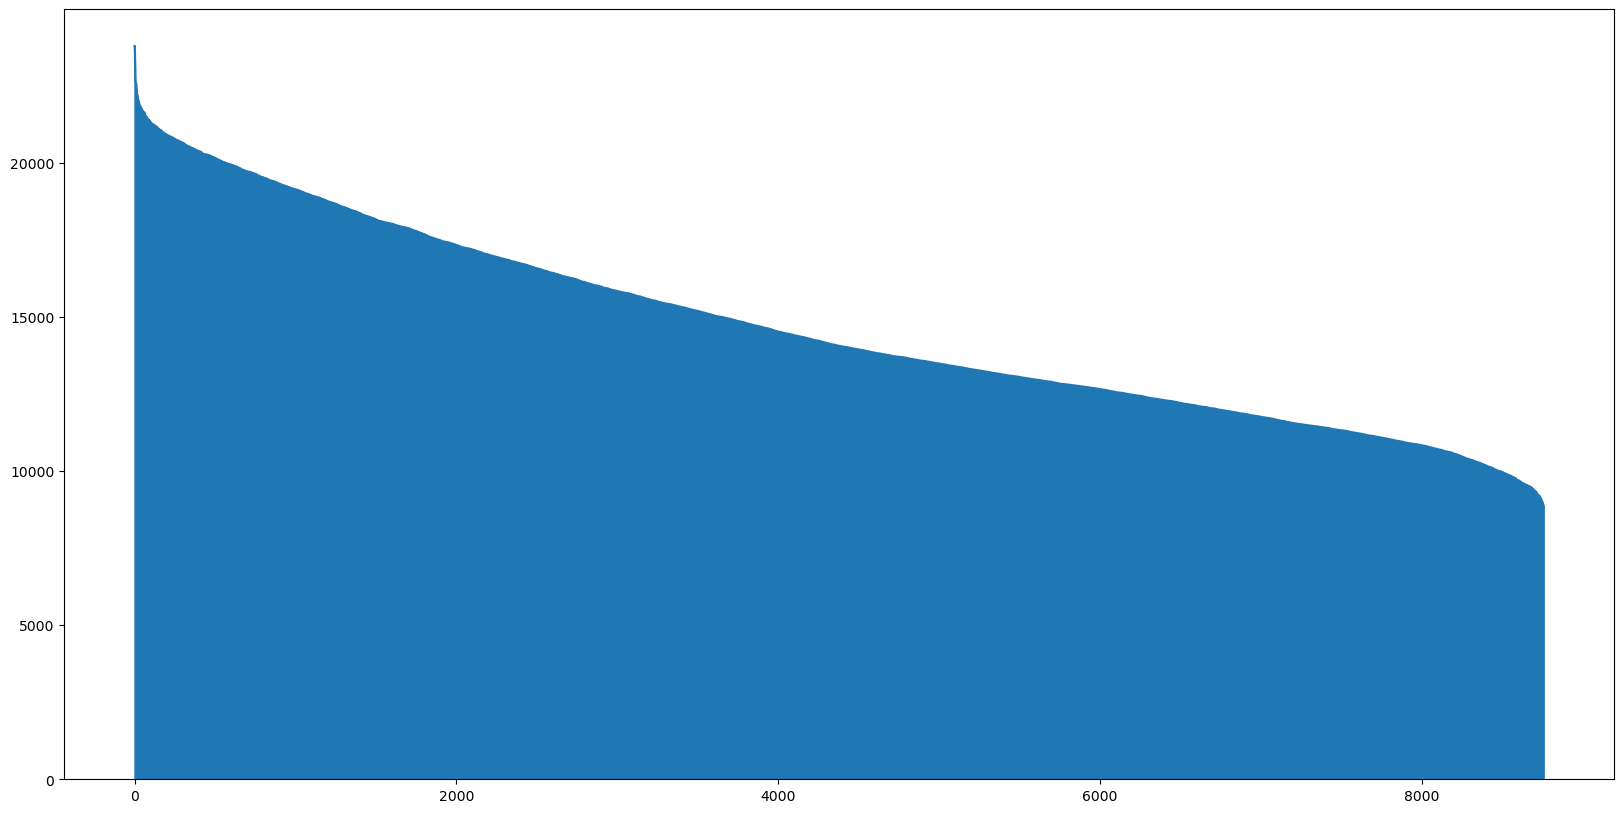

In [5]:
## duration curve and baseload
duration_curve_data = data["load"].sort_values( ascending=False)
duration_curve_data.reset_index()
duration_curve_data.reset_index()["load"].plot.area(figsize=(20, 10))

In [8]:
duration_curve_data

2249    23782.3
2250    23655.3
2248    23589.2
2251    23249.3
2247    22745.0
         ...   
6297     8921.5
6132     8904.2
6971     8892.0
6997     8881.3
6994     8853.7
Name: load, Length: 8759, dtype: float64

<Axes: >

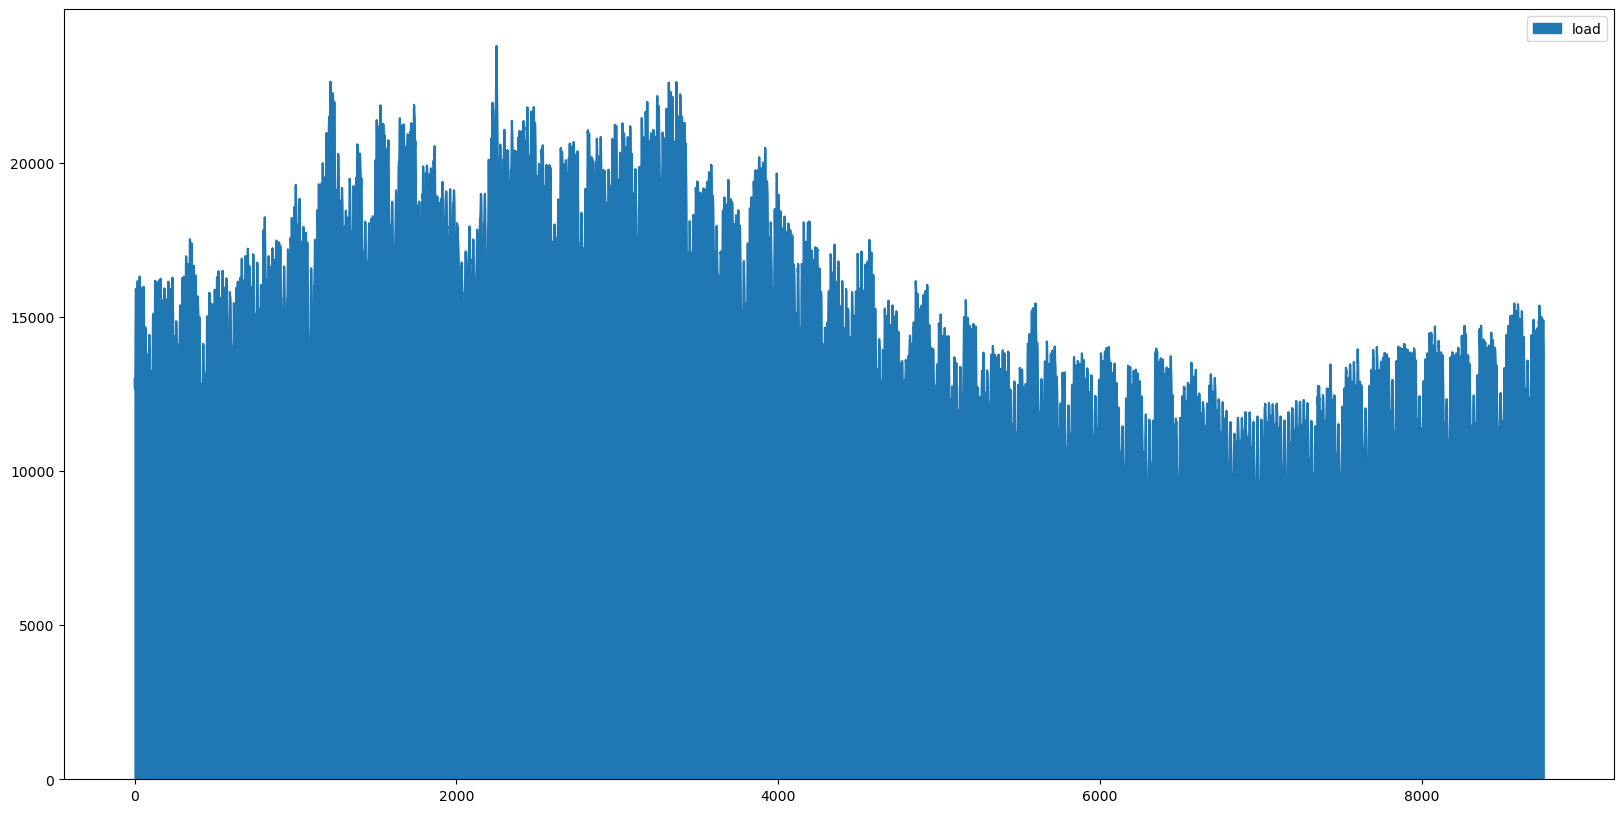

In [6]:
# plot oct (31) nov(30) dec (31) in hours
# y axis show in kWh to 14000 / 1000 = 14 MWh 
data_load.plot.area(figsize=(20, 10))


<Axes: >

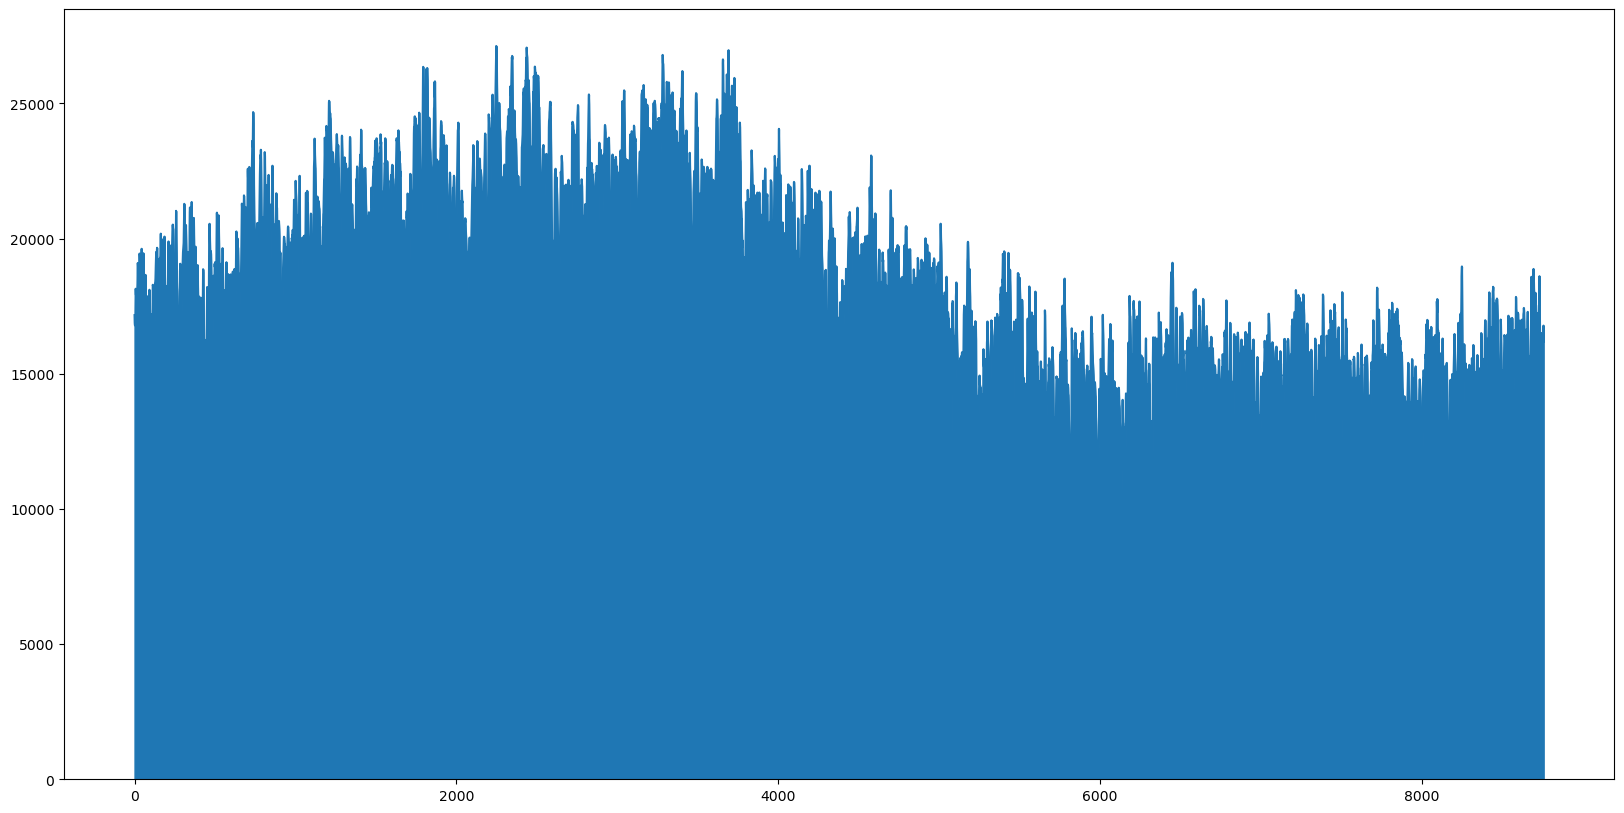

In [10]:
Combined_power_gen.plot.area(figsize=(20, 10))

<Axes: >

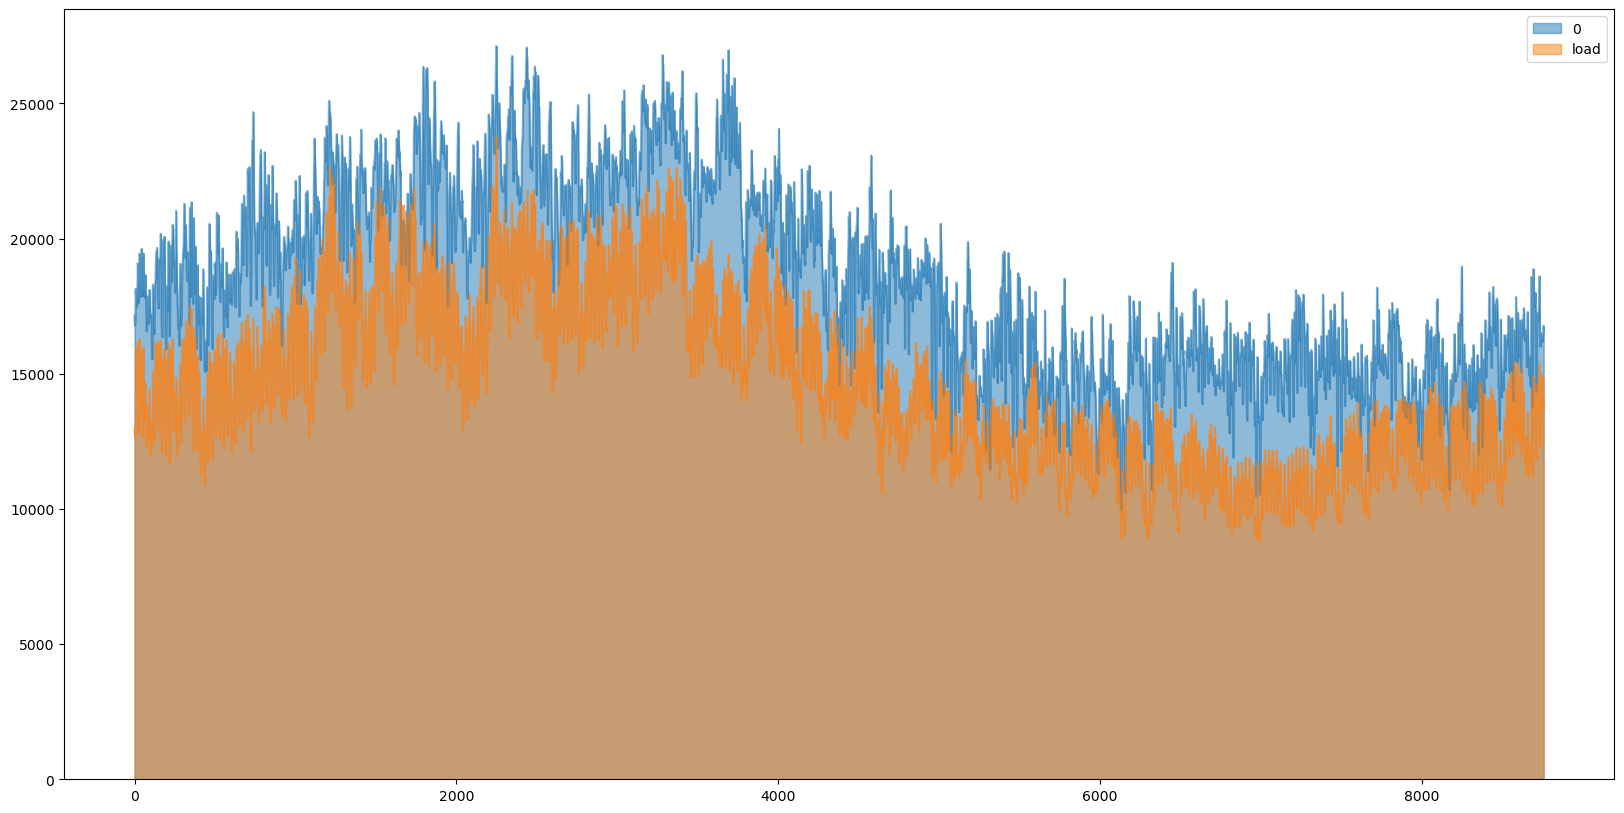

In [11]:
# load in orange and gneration in blue
pd.concat([Combined_power_gen, data_load],axis=1).plot.area(figsize=(20, 10), stacked=False)

In [7]:

print('total load from oct 1 2024 to oct 1 2025: %.2f TWh' % (data_load["load"].sum()/1000000))
total_gen = (data_wind["wind"].sum()/1000000) + (data_hydro["hydro"].sum()/1000000) + (data_heat["heat"].sum()/1000000) + (data_nuclear["nuclear"].sum()/1000000)
print('total generation from oct 1 2024 to oct 1 2025: %.2f TWh' % total_gen)
print('total surplus power from oct 1 2024 to oct 1 2025: %.2f TWh' % (total_gen-(data_load["load"].sum()/1000000) ))


total load from oct 1 2024 to oct 1 2025: 128.45 TWh
total generation from oct 1 2024 to oct 1 2025: 162.58 TWh
total surplus power from oct 1 2024 to oct 1 2025: 34.14 TWh


In [13]:
## how much for total load of 300TWh 
dif_for_300 = 300 - data_load["load"].sum()/1000000
print('what need to be added for a standard year to reach 300TWh from oct 1 2024 to oct 1 2025: %.2f TWh' % dif_for_300)

what need to be added for a standard year to reach 300TWh from oct 1 2024 to oct 1 2025: 171.55 TWh


In [14]:
## increase power gen with 137.42 TWh / total hours 
dif_for_300 / data_load.shape[0]
print('add %.6f TWh to avery hour to reach 300TWh from oct 1 2024 to oct 1 2025 ' % (dif_for_300 / data_load.shape[0]))

add 0.019586 TWh to avery hour to reach 300TWh from oct 1 2024 to oct 1 2025 


In [27]:
# assumes load gro
new_load_for_300 = (data_load["load"] + 19658)

print('total load from oct 1 2024 to oct 1 2025: %.2f TWh' % (new_load_for_300.sum()/1000000))

total load from oct 1 2024 to oct 1 2025: 300.63 TWh


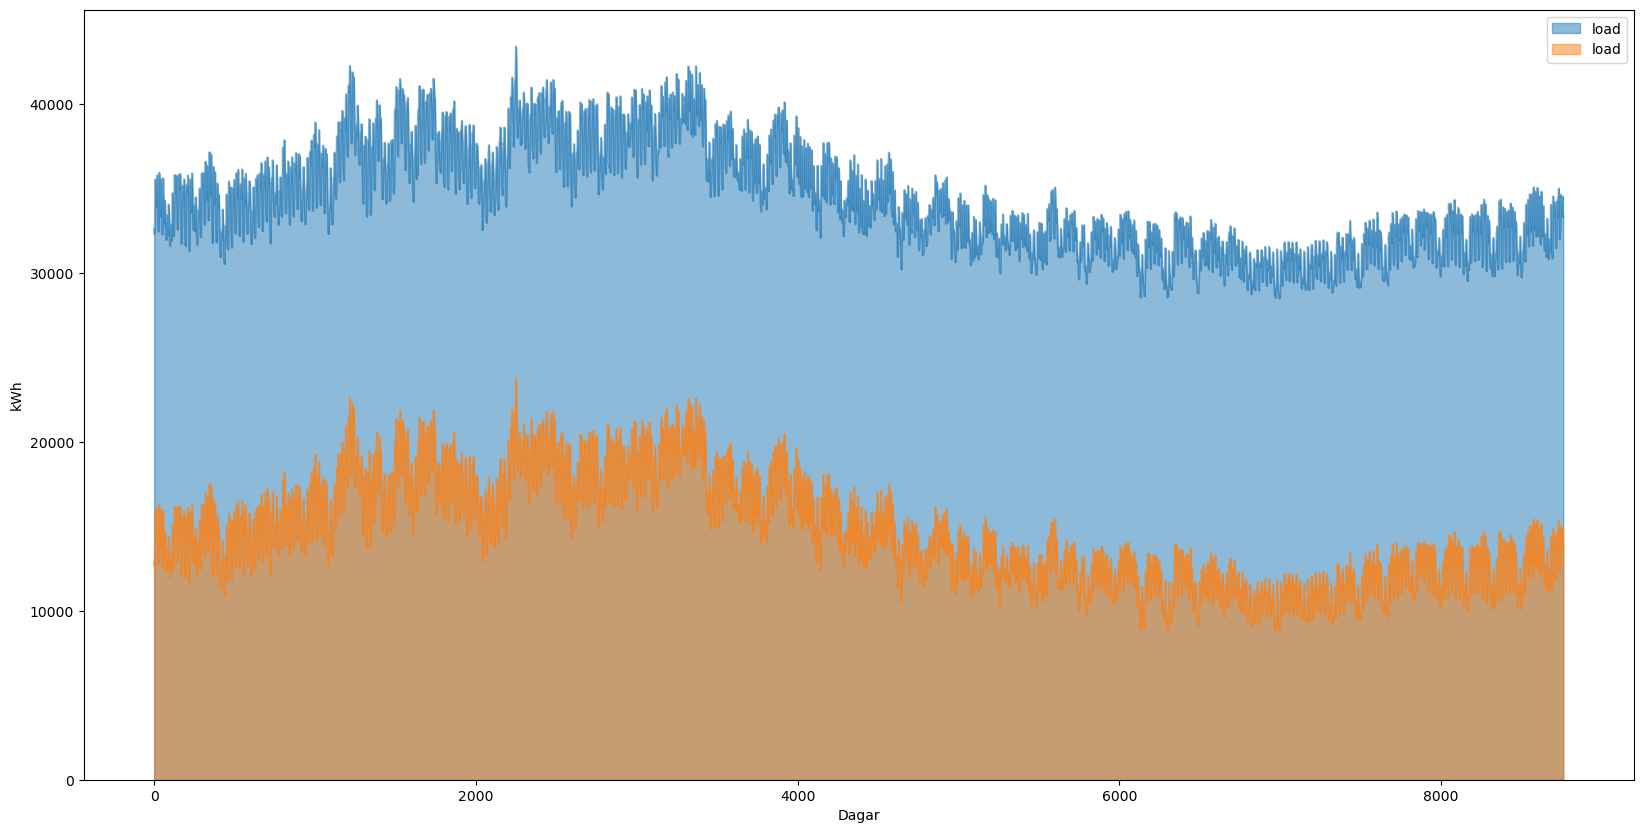

In [30]:
# print with load 
ax_1 = pd.concat([new_load_for_300, data_load],axis=1).plot.area(figsize=(20, 10), stacked=False, label='Sales Data')
ax_1.set_xlabel('Dagar')
ax_1.set_ylabel('kWh')
plt.show()

<Axes: >

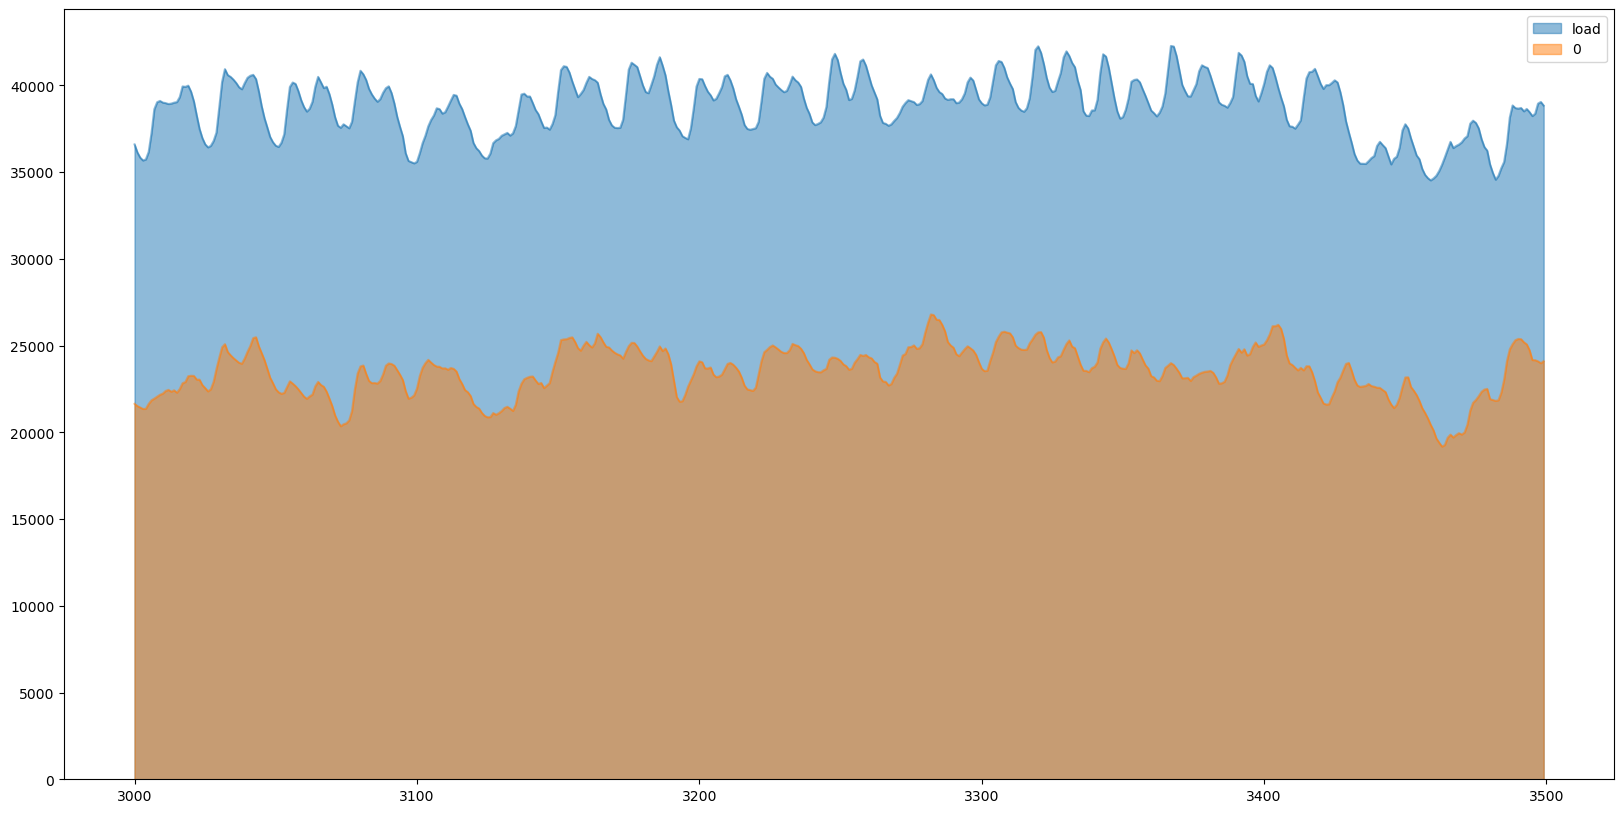

In [31]:
# print new load with current power gen
pd.concat([new_load_for_300, Combined_power_gen],axis=1)[3000:3500].plot.area(figsize=(20, 10), stacked=False)

In [32]:
# double winf power and compare graph

data_increase_wind = data_wind[0:]*11
data_increase_wind

,DateTime,wind
0,2024-10-01 22:00:002024-10-01 22:00:002024-10-...,24543.2
1,2024-10-01 23:00:002024-10-01 23:00:002024-10-...,24015.2
2,2024-10-02 00:00:002024-10-02 00:00:002024-10-...,23765.5
3,2024-10-02 01:00:002024-10-02 01:00:002024-10-...,24057.0
4,2024-10-02 02:00:002024-10-02 02:00:002024-10-...,24526.7
...,...,...
8754,2025-10-01 17:00:002025-10-01 17:00:002025-10-...,27914.7
8755,2025-10-01 18:00:002025-10-01 18:00:002025-10-...,37020.5
8756,2025-10-01 19:00:002025-10-01 19:00:002025-10-...,42647.0
8757,2025-10-01 20:00:002025-10-01 20:00:002025-10-...,44814.0


In [33]:
new_total_gen = (data_increase_wind["wind"].sum()/1000000) + (data_hydro["hydro"].sum()/1000000) + (data_heat["heat"].sum()/1000000) + (data_nuclear["nuclear"].sum()/1000000)
new_total_gen

np.float64(580.9569491999999)

In [38]:
wind_Combined_power_gen = pd.concat([data_increase_wind["wind"], data_hydro["hydro"], data_heat["heat"] , data_nuclear["nuclear"]],axis=1) 
wind_Combined_power_gen["11ggr_vind_generation"] = wind_Combined_power_gen.iloc[:, -4:].sum(axis=1)
wind_Combined_power_gen

,wind,hydro,heat,nuclear,11ggr_vind_generation
0,24543.2,8623.5,742.7,5572.8,39482.2
1,24015.2,8423.2,706.0,5571.7,38716.1
2,23765.5,8372.2,702.3,5567.5,38407.5
3,24057.0,8331.2,701.3,5567.2,38656.7
4,24526.7,8304.8,711.8,5572.2,39115.5
...,...,...,...,...,...
8754,27914.7,7997.0,1271.3,4377.3,41560.3
8755,37020.5,7259.0,1318.0,4373.5,49971.0
8756,42647.0,7181.0,1219.0,4377.5,55424.5
8757,44814.0,7193.0,1130.0,4384.7,57521.7


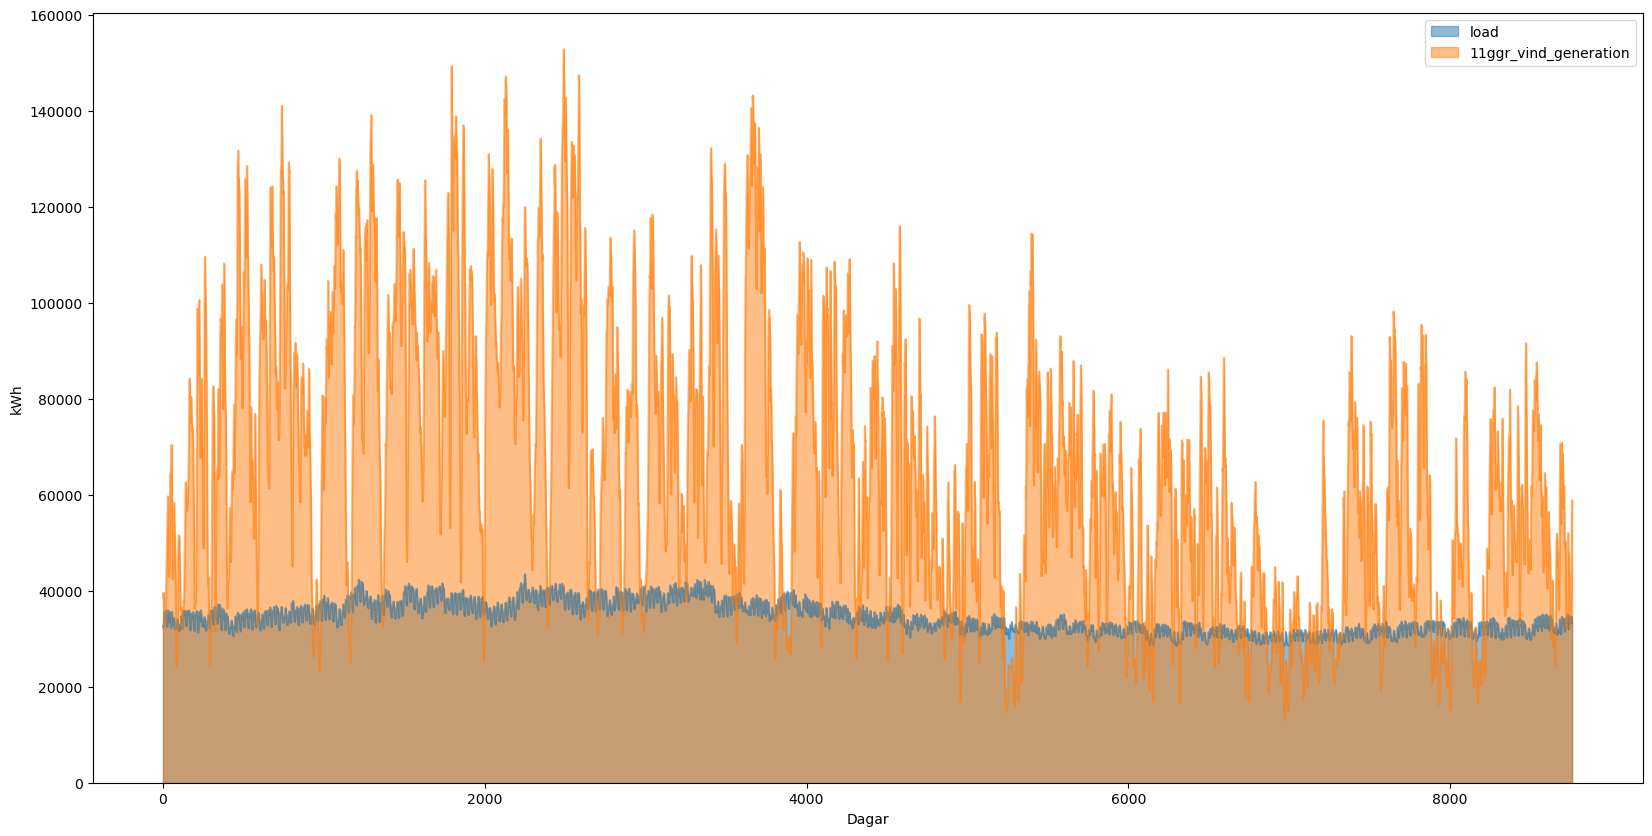

In [39]:
# print new load with current power gen
ax_2 =pd.concat([new_load_for_300, wind_Combined_power_gen["11ggr_vind_generation"]],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_2.set_xlabel('Dagar')
ax_2.set_ylabel('kWh')
plt.show()

In [ ]:
# förra grafen visar på en 11ggr ökning i windkraft kapacitet vilket bidrar till en total generation på ~581 TWh. 
# pågrund av att det varierar så mycket på max och min så skulle inte alla frbrukning varje dag inte täckas.
# detta visar på att enbart en ökning i vindkraft utöver dagens energiproduktion skulle inte vara en bra idee.

<Axes: >

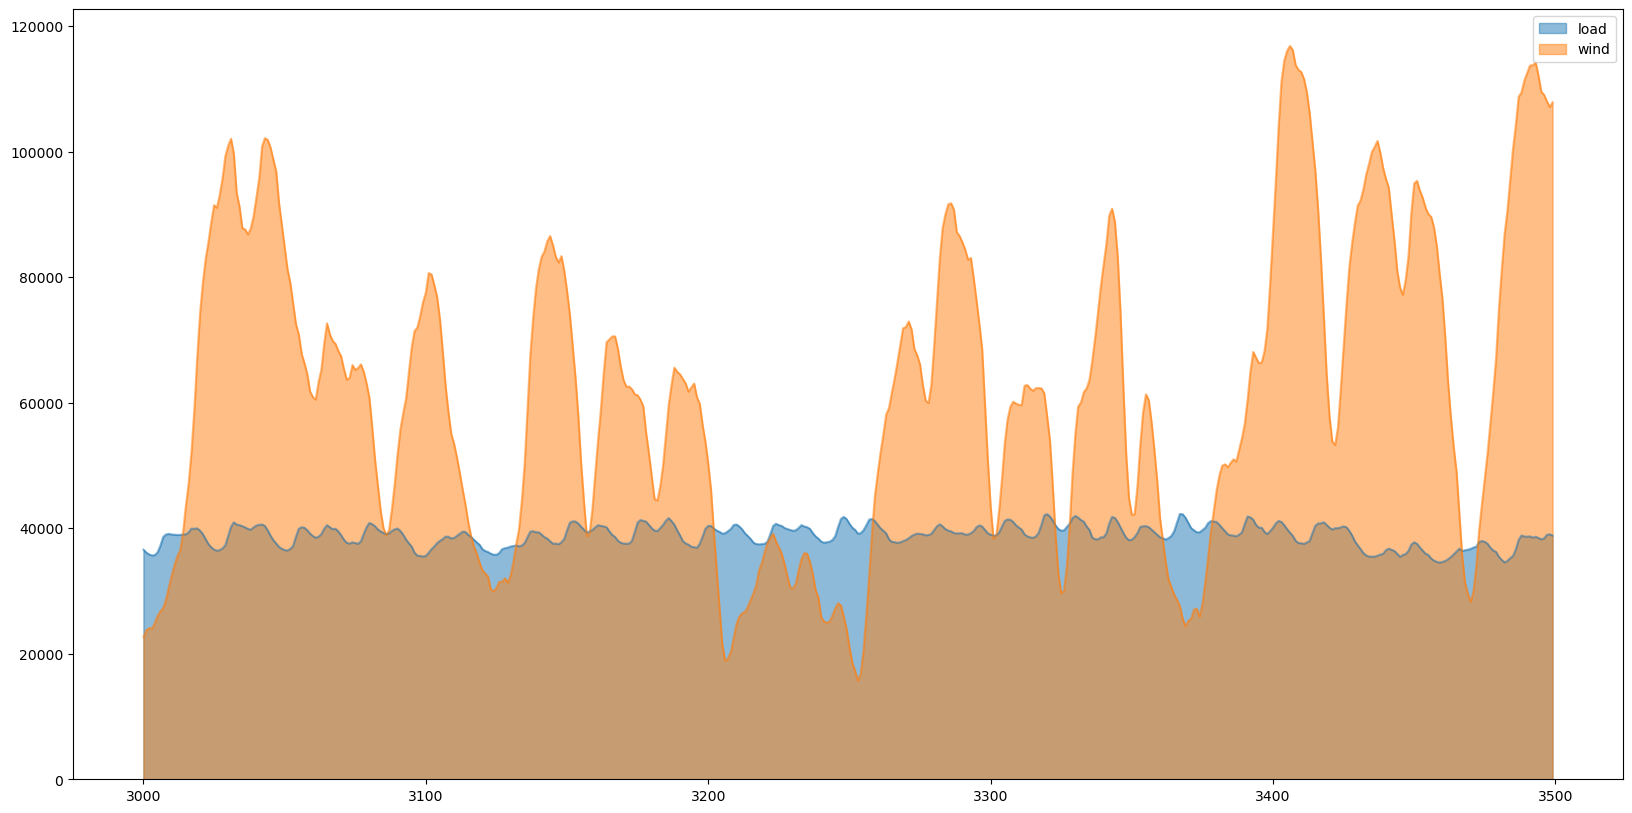

In [211]:
# only showing power gen from wind 
pd.concat([new_load_for_300, data_increase_wind],axis=1)[3000:3500].plot.area(figsize=(20, 10), stacked=False)

In [190]:
"""
provar att öka både vattenkraft och vindkraft
"""

'\nprovar att öka både vattenkraft och vindkraft\n'

In [40]:
# okning wind och vatten
data_increase_wind_2 = data_wind[0:]*3
data_increase_wind_2
data_increase_hydro_2 = data_hydro[0:]*2
data_increase_hydro_2

,DateTime,hydro
0,2024-10-01 22:00:002024-10-01 22:00:00,17247.0
1,2024-10-01 23:00:002024-10-01 23:00:00,16846.4
2,2024-10-02 00:00:002024-10-02 00:00:00,16744.4
3,2024-10-02 01:00:002024-10-02 01:00:00,16662.4
4,2024-10-02 02:00:002024-10-02 02:00:00,16609.6
...,...,...
8754,2025-10-01 17:00:002025-10-01 17:00:00,15994.0
8755,2025-10-01 18:00:002025-10-01 18:00:00,14518.0
8756,2025-10-01 19:00:002025-10-01 19:00:00,14362.0
8757,2025-10-01 20:00:002025-10-01 20:00:00,14386.0


In [41]:
new_total_wind_water_gen = (data_increase_wind_2["wind"].sum()/1000000) + (data_increase_hydro_2["hydro"].sum()/1000000) + (data_heat["heat"].sum()/1000000) + (data_nuclear["nuclear"].sum()/1000000)
new_total_wind_water_gen

np.float64(312.05964650000004)

In [42]:
wind_water_Combined_power_gen = pd.concat([data_increase_wind_2["wind"], data_increase_hydro_2["hydro"], data_heat["heat"] , data_nuclear["nuclear"]],axis=1) 
wind_water_Combined_power_gen["3ggr_vind_2ggr_vatten_generation"] = wind_water_Combined_power_gen.iloc[:, -4:].sum(axis=1)
wind_water_Combined_power_gen

,wind,hydro,heat,nuclear,3ggr_vind_2ggr_vatten_generation
0,6693.6,17247.0,742.7,5572.8,30256.1
1,6549.6,16846.4,706.0,5571.7,29673.7
2,6481.5,16744.4,702.3,5567.5,29495.7
3,6561.0,16662.4,701.3,5567.2,29491.9
4,6689.1,16609.6,711.8,5572.2,29582.7
...,...,...,...,...,...
8754,7613.1,15994.0,1271.3,4377.3,29255.7
8755,10096.5,14518.0,1318.0,4373.5,30306.0
8756,11631.0,14362.0,1219.0,4377.5,31589.5
8757,12222.0,14386.0,1130.0,4384.7,32122.7


<Axes: >

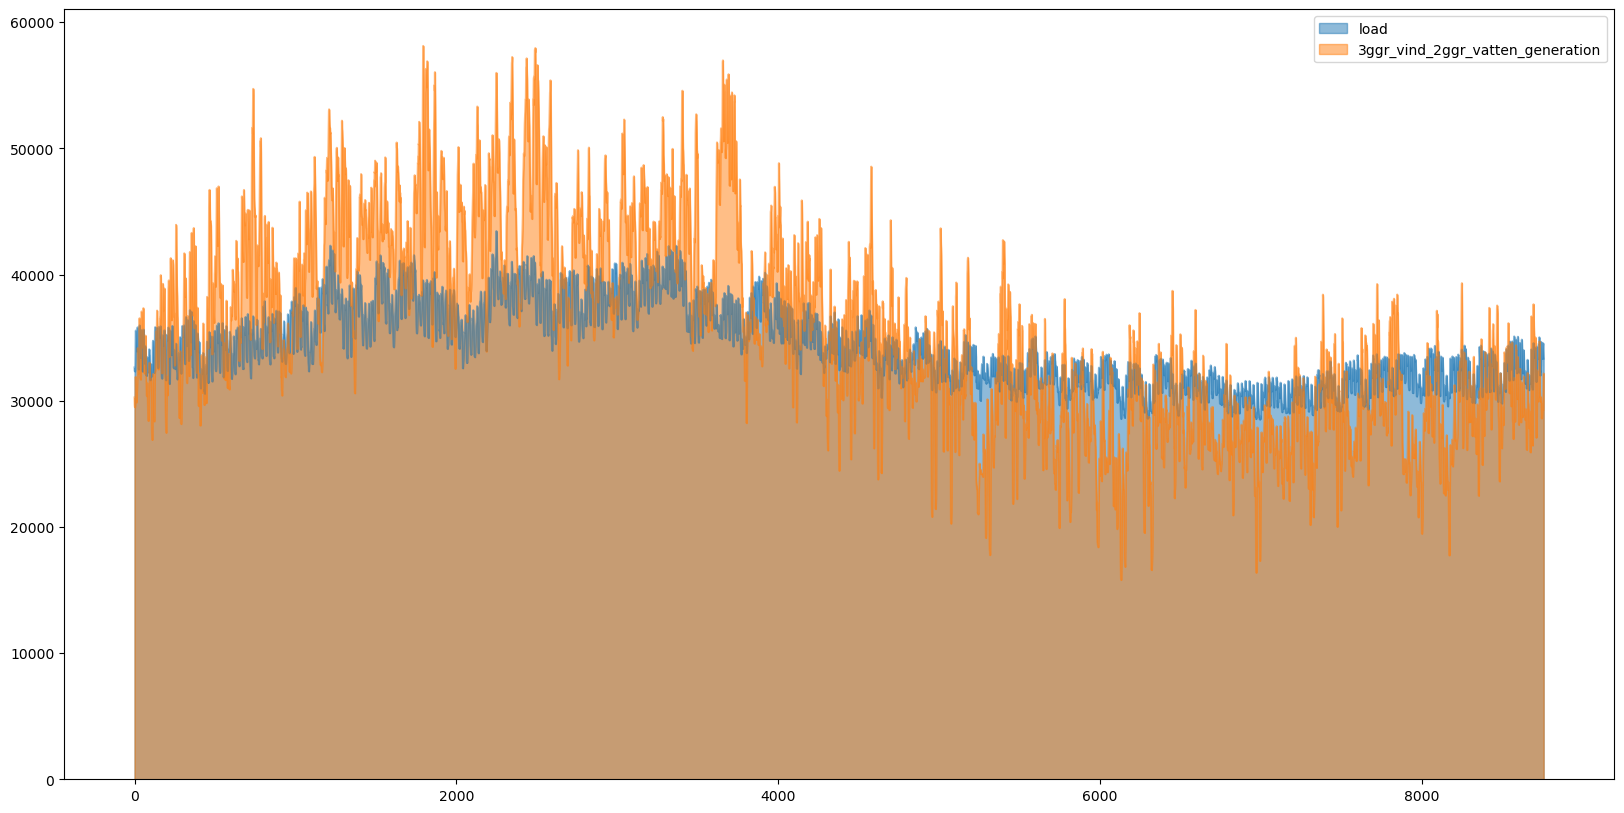

In [44]:
# print new load with current power gen
# note glöm inte kolla hela datan inte bara 3000-3500
pd.concat([new_load_for_300, wind_water_Combined_power_gen["3ggr_vind_2ggr_vatten_generation"]],axis=1).plot.area(figsize=(20, 10), stacked=False)

In [ ]:
# förra grafen visar på en 2ggr ökning i windkraft kapacitet och en 2ggr ökning utav vattenkraft 
# vilket bidrar till en total generation på ~312 TWh mycket närmare 300TWh än bara vindkraft. 
# vi ser fortfarande att det blir stora överskott på vissa tiden och fortfarande några dagar då det inte täcker 
# förbrukningen.
# det visar dock på att en kombination av fossilfria energi källor är mer rimligt.
# det finns vissa bergänsing med vatten kraft och troligheten att det går att öka produktionen är inte sannolik

In [ ]:
"""
provar att öka vindkraften men sedan lagra överskotts energi
gör variabel som har funktionen 
om produktion > last -> spara överskott i vaiablen
om produktion <= last och variablen är = 0  -> gör inget
om produktionen <= last och variablen är > 0 addera skillanden i last tills varieblen är = 0.
"""

'\nprovar att öka vindkraften men sedan lagra överskotts energi\ngör variabel som har funktionen \nom vindkraft > last -> spara överskott i vaiablen\n'

In [46]:
# använder nu läget produktionen
Combined_power_gen_base = pd.concat([data_wind["wind"], data_hydro["hydro"], data_heat["heat"] , data_nuclear["nuclear"]],axis=1) 
Combined_power_gen_base["total"] = Combined_power_gen_base.iloc[:, -4:].sum(axis=1)
Combined_power_gen_base["storage"] = 0
Combined_power_gen_base["add storage"] = 0
Combined_power_gen_base["sub storage"] = 0
Combined_power_gen_base["load"] = data_load["load"]
Combined_power_gen_base

,wind,hydro,heat,nuclear,total,storage,add storage,sub storage,load
0,2231.2,8623.5,742.7,5572.8,17170.2,0,0,0,12976.5
1,2183.2,8423.2,706.0,5571.7,16884.1,0,0,0,12694.3
2,2160.5,8372.2,702.3,5567.5,16802.5,0,0,0,12671.7
3,2187.0,8331.2,701.3,5567.2,16786.7,0,0,0,12664.3
4,2229.7,8304.8,711.8,5572.2,16818.5,0,0,0,12794.7
...,...,...,...,...,...,...,...,...,...
8754,2537.7,7997.0,1271.3,4377.3,16183.3,0,0,0,14704.7
8755,3365.5,7259.0,1318.0,4373.5,16316.0,0,0,0,14895.5
8756,3877.0,7181.0,1219.0,4377.5,16654.5,0,0,0,14407.0
8757,4074.0,7193.0,1130.0,4384.7,16781.7,0,0,0,13841.0


In [47]:
total_storage = 0
for index, row in Combined_power_gen_base.iterrows():
    
    if row["total"] > row["load"]:
        total_storage = total_storage + (row["total"] - row["load"])
        Combined_power_gen_base.iloc[index, 6] = row["total"] - row["load"]
        
    elif row["total"] < row["load"]:
        total_storage = total_storage - (row["load"] - row["total"])
        Combined_power_gen_base.iloc[index, 7] = row["load"] - row["total"]
    Combined_power_gen_base.iloc[index, 5] = total_storage


C:\Users\ft_sk\AppData\Local\Temp\ipykernel_86636\3138723876.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4193.700000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Combined_power_gen_base.iloc[index, 6] = row["total"] - row["load"]
C:\Users\ft_sk\AppData\Local\Temp\ipykernel_86636\3138723876.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4193.700000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Combined_power_gen_base.iloc[index, 5] = total_storage
C:\Users\ft_sk\AppData\Local\Temp\ipykernel_86636\3138723876.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '150.5' has dtype incompatible with int64, please explicitly cast to a c

In [48]:
Combined_power_gen_base

,wind,hydro,heat,nuclear,total,storage,add storage,sub storage,load
0,2231.2,8623.5,742.7,5572.8,17170.2,4193.7,4193.7,0.0,12976.5
1,2183.2,8423.2,706.0,5571.7,16884.1,8383.5,4189.8,0.0,12694.3
2,2160.5,8372.2,702.3,5567.5,16802.5,12514.3,4130.8,0.0,12671.7
3,2187.0,8331.2,701.3,5567.2,16786.7,16636.7,4122.4,0.0,12664.3
4,2229.7,8304.8,711.8,5572.2,16818.5,20660.5,4023.8,0.0,12794.7
...,...,...,...,...,...,...,...,...,...
8754,2537.7,7997.0,1271.3,4377.3,16183.3,34127796.6,1478.6,0.0,14704.7
8755,3365.5,7259.0,1318.0,4373.5,16316.0,34129217.1,1420.5,0.0,14895.5
8756,3877.0,7181.0,1219.0,4377.5,16654.5,34131464.6,2247.5,0.0,14407.0
8757,4074.0,7193.0,1130.0,4384.7,16781.7,34134405.3,2940.7,0.0,13841.0


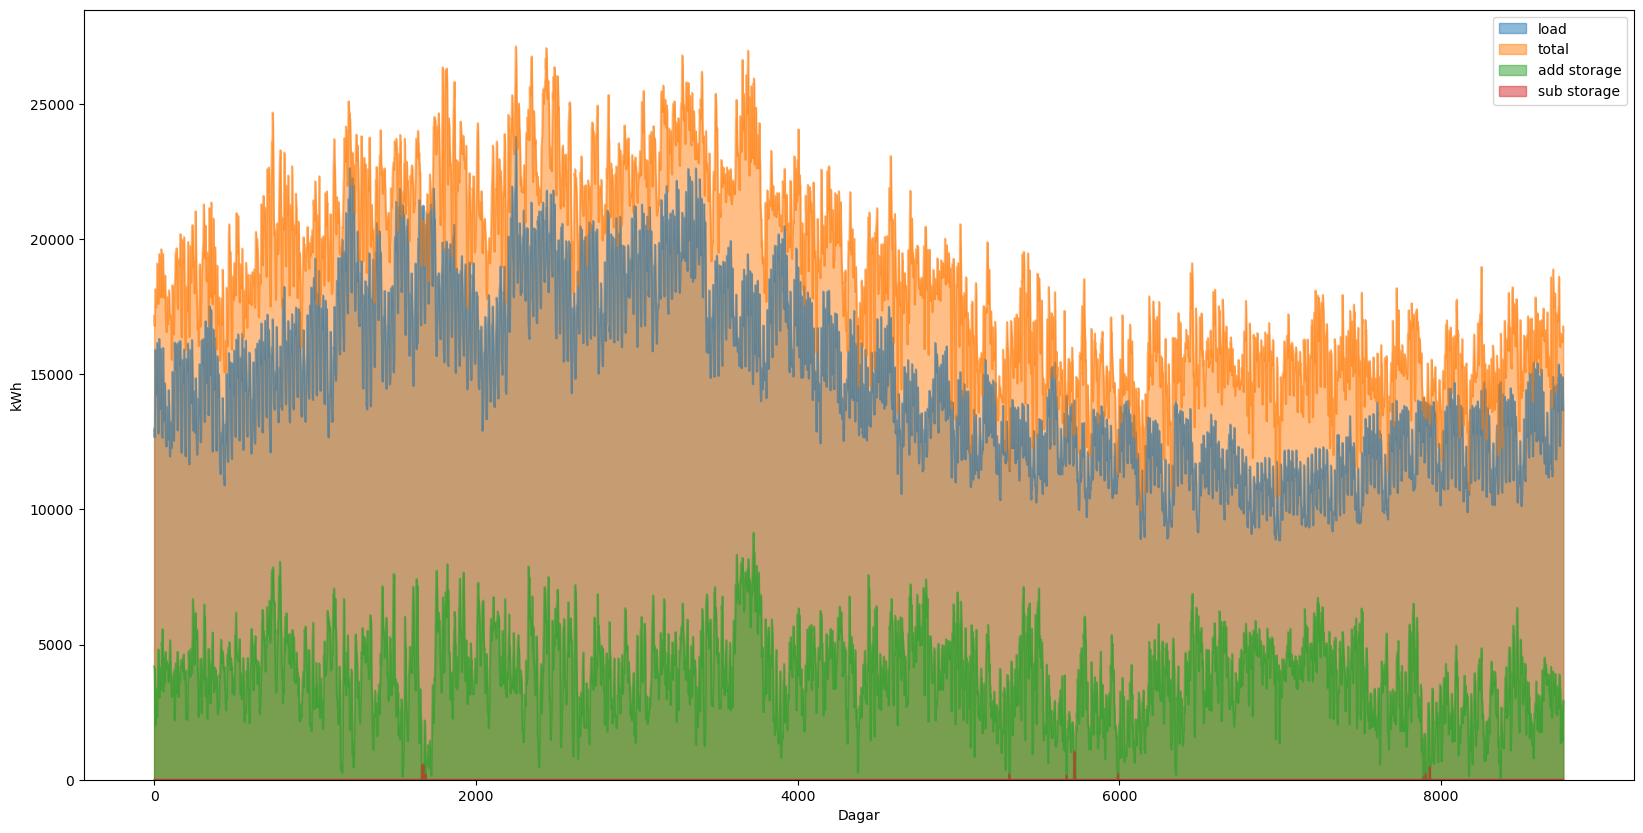

In [60]:
# plot normal load and power gen + storage 
ax_3 = pd.concat([data_load["load"], Combined_power_gen_base["total"],Combined_power_gen_base["add storage"], Combined_power_gen_base["sub storage"] ],axis=1).plot.area(figsize=(20, 10), stacked=False)
ax_3.set_xlabel('Dagar')
ax_3.set_ylabel('kWh')
plt.show()

In [262]:
## grafen visar på att det produceras mycket mer än vad som används 
# och det är bara ett par fåtal punkter som det under produceras

In [50]:
# gör samma sak som innan men med bara ökning i vindkraft
wind_Combined_power_gen["storage"] = 0
wind_Combined_power_gen["add storage"] = 0
wind_Combined_power_gen["sub storage"] = 0
wind_Combined_power_gen["load"] = new_load_for_300
wind_Combined_power_gen

,wind,hydro,heat,nuclear,11ggr_vind_generation,storage,add storage,sub storage,load
0,24543.2,8623.5,742.7,5572.8,39482.2,0,0,0,32634.5
1,24015.2,8423.2,706.0,5571.7,38716.1,0,0,0,32352.3
2,23765.5,8372.2,702.3,5567.5,38407.5,0,0,0,32329.7
3,24057.0,8331.2,701.3,5567.2,38656.7,0,0,0,32322.3
4,24526.7,8304.8,711.8,5572.2,39115.5,0,0,0,32452.7
...,...,...,...,...,...,...,...,...,...
8754,27914.7,7997.0,1271.3,4377.3,41560.3,0,0,0,34362.7
8755,37020.5,7259.0,1318.0,4373.5,49971.0,0,0,0,34553.5
8756,42647.0,7181.0,1219.0,4377.5,55424.5,0,0,0,34065.0
8757,44814.0,7193.0,1130.0,4384.7,57521.7,0,0,0,33499.0


In [54]:
total_storage = 0
for index, row in wind_Combined_power_gen.iterrows():
    
    if row["wind"] > row["load"]:
        total_storage = total_storage + (row["wind"] - row["load"])
        wind_Combined_power_gen.iloc[index, 6] = row["wind"] - row["load"]
        
    elif row["wind"] < row["load"]:
        total_storage = total_storage - (row["load"] - row["wind"])
        wind_Combined_power_gen.iloc[index, 6] = row["load"] - row["wind"]
    wind_Combined_power_gen.iloc[index, 5] = total_storage

In [55]:
wind_Combined_power_gen

,wind,hydro,heat,nuclear,11ggr_vind_generation,storage,add storage,sub storage,load
0,24543.2,8623.5,742.7,5572.8,-8091.3,-8091.3,8091.3,0,32634.5
1,24015.2,8423.2,706.0,5571.7,-16428.4,-16428.4,8337.1,0,32352.3
2,23765.5,8372.2,702.3,5567.5,-24992.6,-24992.6,8564.2,0,32329.7
3,24057.0,8331.2,701.3,5567.2,-33257.9,-33257.9,8265.3,0,32322.3
4,24526.7,8304.8,711.8,5572.2,-41183.9,-41183.9,7926.0,0,32452.7
...,...,...,...,...,...,...,...,...,...
8754,27914.7,7997.0,1271.3,4377.3,159542144.0,159542144.0,6448.0,0,34362.7
8755,37020.5,7259.0,1318.0,4373.5,159544611.0,159544611.0,2467.0,0,34553.5
8756,42647.0,7181.0,1219.0,4377.5,159553193.0,159553193.0,8582.0,0,34065.0
8757,44814.0,7193.0,1130.0,4384.7,159564508.0,159564508.0,11315.0,0,33499.0


<Axes: >

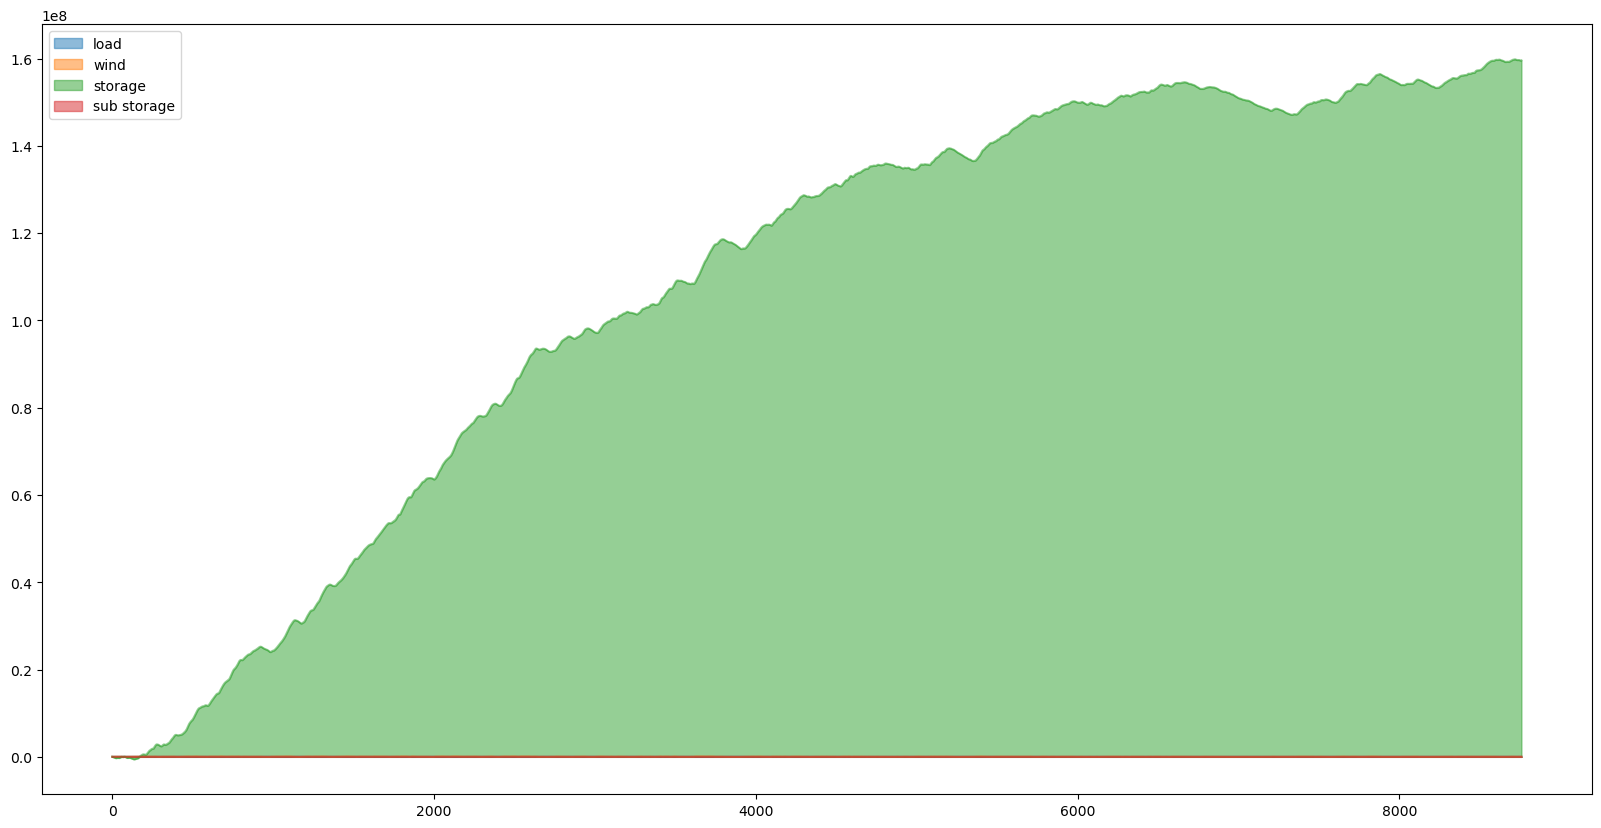

In [56]:
pd.concat([wind_Combined_power_gen["load"], wind_Combined_power_gen["wind"],wind_Combined_power_gen["storage"], wind_Combined_power_gen["sub storage"],  ],axis=1).plot.area(figsize=(20, 10), stacked=False)

In [57]:
### ökar vinkraft 2gg och introduserar 1 TWh kap i lagring
data_increase_wind_with_storage = data_wind[0:]*5
data_increase_wind_with_storage

data_increase_wind_with_storage_base = pd.concat([data_increase_wind_with_storage["wind"], data_hydro["hydro"], data_heat["heat"] , data_nuclear["nuclear"]],axis=1) 
data_increase_wind_with_storage_base["total"] = data_increase_wind_with_storage_base.iloc[:, -4:].sum(axis=1)
data_increase_wind_with_storage_base["storage"] = 0
data_increase_wind_with_storage_base["total and storage"] = 0
data_increase_wind_with_storage_base["add storage"] = 0
data_increase_wind_with_storage_base["sub storage"] = 0
data_increase_wind_with_storage_base["load"] = new_load_for_300
data_increase_wind_with_storage_base

,wind,hydro,heat,nuclear,total,storage,total and storage,add storage,sub storage,load
0,11156.0,8623.5,742.7,5572.8,26095.0,0,0,0,0,32634.5
1,10916.0,8423.2,706.0,5571.7,25616.9,0,0,0,0,32352.3
2,10802.5,8372.2,702.3,5567.5,25444.5,0,0,0,0,32329.7
3,10935.0,8331.2,701.3,5567.2,25534.7,0,0,0,0,32322.3
4,11148.5,8304.8,711.8,5572.2,25737.3,0,0,0,0,32452.7
...,...,...,...,...,...,...,...,...,...,...
8754,12688.5,7997.0,1271.3,4377.3,26334.1,0,0,0,0,34362.7
8755,16827.5,7259.0,1318.0,4373.5,29778.0,0,0,0,0,34553.5
8756,19385.0,7181.0,1219.0,4377.5,32162.5,0,0,0,0,34065.0
8757,20370.0,7193.0,1130.0,4384.7,33077.7,0,0,0,0,33499.0


In [58]:
total_storage = 0
max_storage = 100000
for index, row in data_increase_wind_with_storage_base.iterrows():
    temp_total = row["total"]
    temp_load = row["load"]
    
    if temp_total < temp_load:
        
        if (temp_load - temp_total) < total_storage:
            temp_total = temp_total + total_storage
            total_storage = 0
        elif (temp_load - temp_total) > total_storage and total_storage != 0:
            temp_dif = temp_load - temp_total
            temp_total = temp_total + temp_dif
            total_storage = total_storage - temp_dif
            if total_storage < 0:
                total_storage = 0
    data_increase_wind_with_storage_base.iloc[index, 6]  = temp_total
    if temp_total > temp_load:
        if max_storage > total_storage:
            total_storage = total_storage + (temp_total - temp_load)
            if total_storage > max_storage:
                total_storage = max_storage

            data_increase_wind_with_storage_base.iloc[index, 7] = temp_total - temp_load
        
    elif temp_total < temp_load:
        total_storage = total_storage - (temp_load - temp_load)
        if total_storage < 0:
            total_storage = 0
        data_increase_wind_with_storage_base.iloc[index, 8] = temp_load - temp_total

    data_increase_wind_with_storage_base.iloc[index, 5] = total_storage

C:\Users\ft_sk\AppData\Local\Temp\ipykernel_86636\774018657.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6539.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_increase_wind_with_storage_base.iloc[index, 8] = temp_load - temp_total
C:\Users\ft_sk\AppData\Local\Temp\ipykernel_86636\774018657.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25616.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_increase_wind_with_storage_base.iloc[index, 6]  = temp_total
C:\Users\ft_sk\AppData\Local\Temp\ipykernel_86636\774018657.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '57.400000000001455' has dtype incompatible with int64, please explicitly c

In [ ]:
total_storage = 0
max_storage = 10000
for index, row in data_increase_wind_with_storage_base.iterrows():
    temp_total = row["total"]
    temp_load = row["load"]
    storage_dif = 0
    if temp_total > temp_load:
        if max_storage > total_storage:
            total_storage = total_storage + (temp_total - temp_load)
            if total_storage > max_storage:
                total_storage = max_storage

        data_increase_wind_with_storage_base.iloc[index, 7] = temp_total - temp_load
        
    elif temp_total < temp_load:
        total_storage = total_storage - (temp_load - temp_load)
        if total_storage < 0:
            total_storage = 0
        data_increase_wind_with_storage_base.iloc[index, 8] = temp_load - temp_total
    
    if data_increase_wind_with_storage_base.iloc[index, 5] >= 0:
        if data_increase_wind_with_storage_base.iloc[index, 8] > 0:
            data_increase_wind_with_storage_base.iloc[index, 5] = data_increase_wind_with_storage_base.iloc[index, 5] - data_increase_wind_with_storage_base.iloc[index, 8]
            if data_increase_wind_with_storage_base.iloc[index, 5] < 0:
                data_increase_wind_with_storage_base.iloc[index, 5] = 0
        elif data_increase_wind_with_storage_base.iloc[index, 7] > 0:
            data_increase_wind_with_storage_base.iloc[index, 5] = data_increase_wind_with_storage_base.iloc[index, 5] + data_increase_wind_with_storage_base.iloc[index, 7]
            if data_increase_wind_with_storage_base.iloc[index, 5] > max_storage:
                data_increase_wind_with_storage_base.iloc[index, 5] = max_storage
    #data_increase_wind_with_storage_base.iloc[index, 5] = total_storage
    

C:\Users\ft_sk\AppData\Local\Temp\ipykernel_108956\519392393.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6539.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_increase_wind_with_storage_base.iloc[index, 8] = temp_load - temp_total
C:\Users\ft_sk\AppData\Local\Temp\ipykernel_108956\519392393.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6539.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_increase_wind_with_storage_base.iloc[index, 5] = data_increase_wind_with_storage_base.iloc[index, 5] - data_increase_wind_with_storage_base.iloc[index, 8]
C:\Users\ft_sk\AppData\Local\Temp\ipykernel_108956\519392393.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future ver

In [475]:
data_increase_wind_with_storage_base

,wind,hydro,heat,nuclear,total,storage,total and storage,add storage,sub storage,load
0,11156.0,8623.5,742.7,5572.8,26095.0,0.0,0,0.0,6539.5,32634.5
1,10916.0,8423.2,706.0,5571.7,25616.9,0.0,0,0.0,6735.4,32352.3
2,10802.5,8372.2,702.3,5567.5,25444.5,0.0,0,0.0,6885.2,32329.7
3,10935.0,8331.2,701.3,5567.2,25534.7,0.0,0,0.0,6787.6,32322.3
4,11148.5,8304.8,711.8,5572.2,25737.3,0.0,0,0.0,6715.4,32452.7
...,...,...,...,...,...,...,...,...,...,...
8754,12688.5,7997.0,1271.3,4377.3,26334.1,0.0,0,0.0,8028.6,34362.7
8755,16827.5,7259.0,1318.0,4373.5,29778.0,0.0,0,0.0,4775.5,34553.5
8756,19385.0,7181.0,1219.0,4377.5,32162.5,0.0,0,0.0,1902.5,34065.0
8757,20370.0,7193.0,1130.0,4384.7,33077.7,0.0,0,0.0,421.3,33499.0


<Axes: >

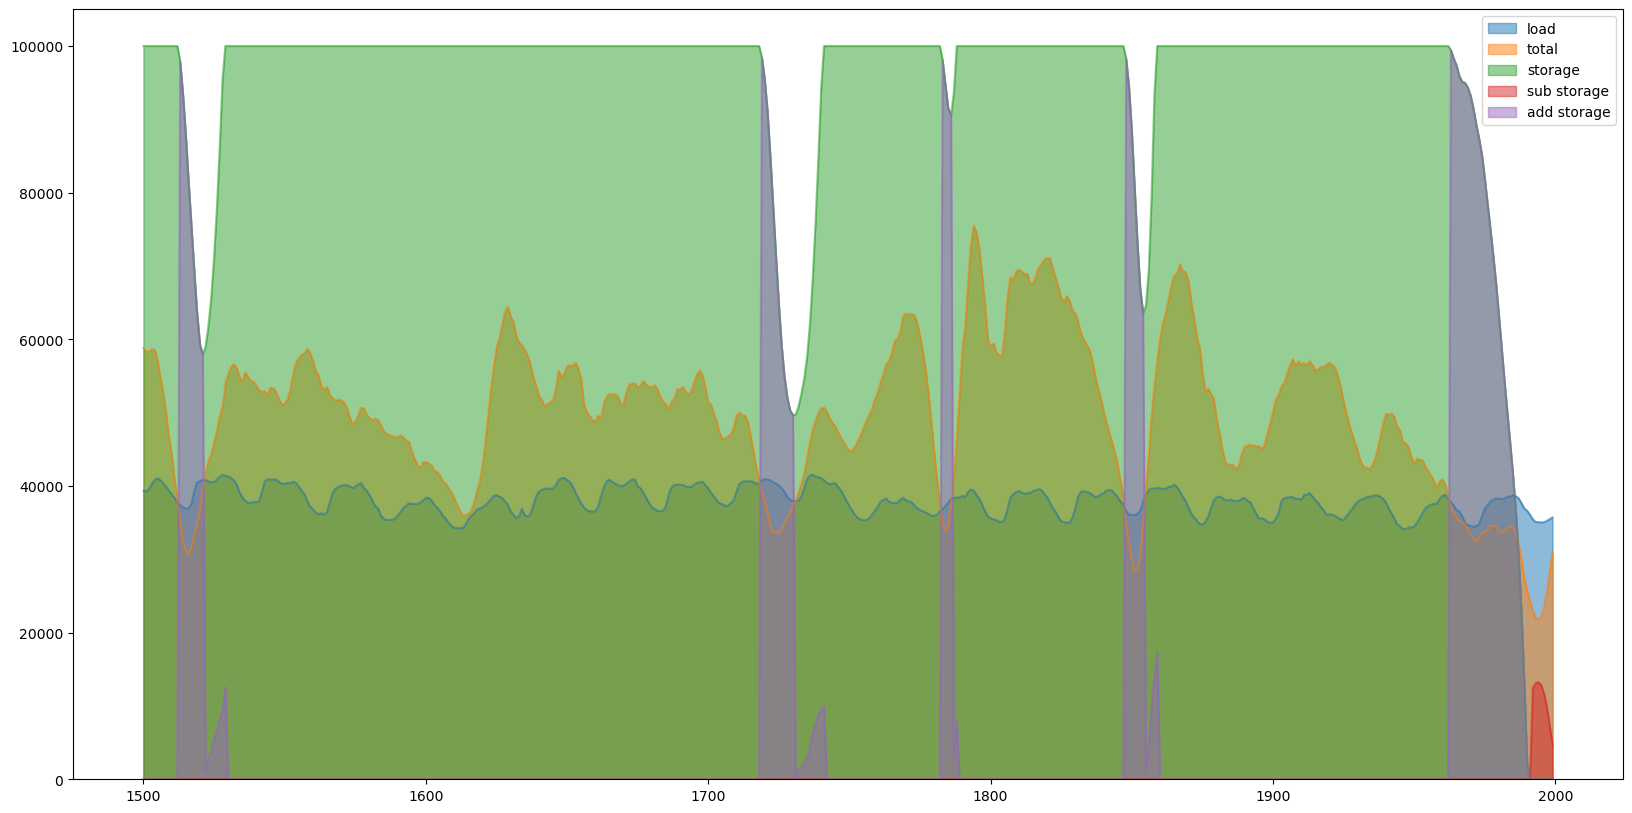

In [59]:
pd.concat([data_increase_wind_with_storage_base["load"], data_increase_wind_with_storage_base["total"],data_increase_wind_with_storage_base["storage"], data_increase_wind_with_storage_base["sub storage"], data_increase_wind_with_storage_base["add storage"] ],axis=1)[1500:2000].plot.area(figsize=(20, 10), stacked=False)